<a href="https://colab.research.google.com/github/JustAlex5/deep_learning/blob/main/Final_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Input
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential, Model

import numpy as np
from tensorflow.keras.layers import SimpleRNN, LSTM ,RepeatVector,Reshape# <--- recurrent layers
from tensorflow.keras.utils import to_categorical

print(tf.__version__)

2.7.0


MNIST_train_images.shape = (60000, 28, 28, 1)
MNIST_train_labels.shape = (60000,)
MNIST_test_images.shape = (10000, 28, 28, 1)
MNIST_test_labels.shape = (10000,)


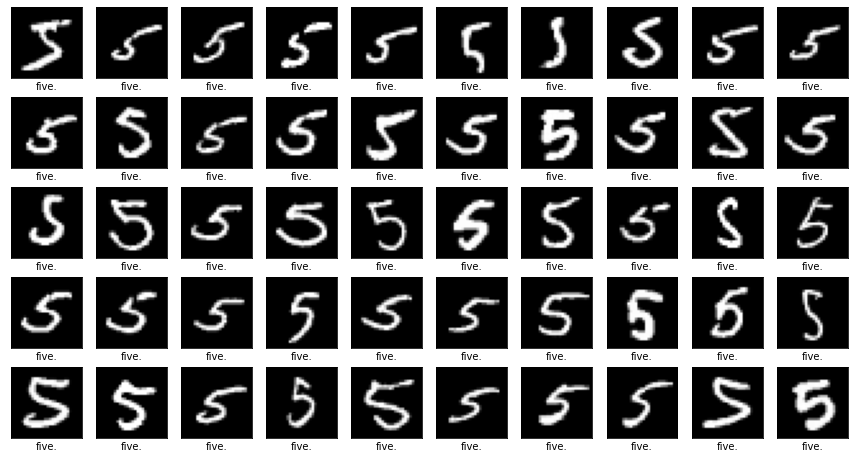

In [ ]:
(MNIST_train_images, MNIST_train_labels), (MNIST_test_images, MNIST_test_labels) = tf.keras.datasets.mnist.load_data()

# 2. flatten the labels (easier to deal with)
MNIST_train_labels = MNIST_train_labels.flatten()  # (50000, 1) -> (50000,)
MNIST_test_labels = MNIST_test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
MNIST_train_images = MNIST_train_images.astype('float32') / 255.0
MNIST_test_images = MNIST_test_images.astype('float32') / 255.0

# 4. expand the dimensions (tensorflow expects images in a (H,W,C) format):
# (Height, Width, Channel), in our case we have 3 color channels (R,G,B)
MNIST_train_images = MNIST_train_images[...,None]
MNIST_test_images = MNIST_test_images[..., None]

# 5. print the shapes
print('MNIST_train_images.shape =',MNIST_train_images.shape)
print('MNIST_train_labels.shape =',MNIST_train_labels.shape)
print('MNIST_test_images.shape =',MNIST_test_images.shape)
print('MNIST_test_labels.shape =',MNIST_test_labels.shape)


class_names = ['zero.','one.', 'two.', 'three.', 'four.', 'five.',
               'six.', 'seven.', 'eight.', 'nine.']

# 6. lets plot some "5"s (just for fun)
[idx] = np.where(MNIST_train_labels==5) # find all the "5"s
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(MNIST_train_images[idx[i],:,:,0], cmap='gray')
    plt.xlabel(class_names[MNIST_train_labels[idx[i]]])
    plt.xticks([]), plt.yticks([])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(MNIST_train_images, MNIST_train_labels, epochs=5, 
                    validation_data=(MNIST_test_images, MNIST_test_labels))



Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1422 - accuracy: 0.9561 - val_loss: 0.0516 - val_accuracy: 0.9829
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0391 - val_accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0339 - accuracy: 0.9900 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0367 - val_accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0282 - val_accuracy: 0.9911


313/313 - 1s - loss: 0.0282 - accuracy: 0.9911 - 882ms/epoch - 3ms/step


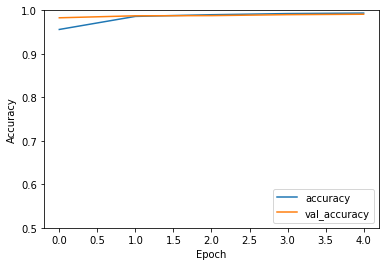

In [ ]:


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(MNIST_test_images,  MNIST_test_labels, verbose=2)



In [ ]:
chars =  ['*','.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [ ]:
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

ix_to_char

{0: '*',
 1: '.',
 2: 'a',
 3: 'b',
 4: 'c',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'h',
 10: 'i',
 11: 'j',
 12: 'k',
 13: 'l',
 14: 'm',
 15: 'n',
 16: 'o',
 17: 'p',
 18: 'q',
 19: 'r',
 20: 's',
 21: 't',
 22: 'u',
 23: 'v',
 24: 'w',
 25: 'x',
 26: 'y',
 27: 'z'}

In [ ]:
y_test=[]
y_train=[]

In [ ]:
for i in range(len(MNIST_test_labels)):
  y_test.append(class_names[MNIST_test_labels[i]])

for i in range(len(MNIST_train_labels)):
  y_train.append(class_names[MNIST_train_labels[i]])
                      

In [ ]:
y_train

In [ ]:
chars=' .*abcdefghijklmnopqrstuvwxyz'
class_names = ['zero','one', 'two', 'three', 'four', 'five','six', 'seven', 'eight', 'nine']
char_to_ix= {ch:i for i,ch in enumerate(chars)}
ix_to_char={i:ch for i,ch in enumerate(chars)}

X = np.zeros((len(MNIST_train_images), 10, len(chars)), dtype='bool')
Y = np.zeros((len(MNIST_train_images),10,len(chars)), dtype='bool')


for i, seq in enumerate(y_train):
    for t, char in enumerate(seq):
        if t==0:
            X[i, 0, char_to_ix['*']] = 1
            X[i, t+1, char_to_ix[char]] = 1
            Y[i,0, char_to_ix[char]] = 1
        Y[i,t, char_to_ix[char]]=1
        if char=='.':
            break
        X[i, t+1, char_to_ix[char]] = 1
    X[i,t+1:,char_to_ix[' ']]=1
    Y[i,t:,char_to_ix[' ']]=1


In [ ]:
[ix_to_char[i] for i in np.argmax(Y[1000]+0, axis=1)]

['z', 'e', 'r', 'o', ' ', ' ', ' ', ' ', ' ', ' ']

In [ ]:
[ix_to_char[i] for i in np.argmax(X[1000]+0, axis=1)]

['*', 'z', 'e', 'r', 'o', ' ', ' ', ' ', ' ', ' ']

In [ ]:
encoder_inputs = Input(shape=(28, 28, 1))
encoder = models.Sequential()
for layer in model.layers[:-1]: # go through until last layer
    encoder.add(layer)
encoder.add(layers.Dense(16, activation='softmax'))

for layer in encoder.layers[:-1]: # go through until last layer
    layer.trainable = False

encoder_states = encoder(encoder_inputs)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, len(chars)))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_rnn = SimpleRNN(16, return_sequences=True)
decoder_outputs= decoder_rnn(decoder_inputs, initial_state=encoder_states)
decoder_dense = layers.Dense(len(chars), activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
full_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
full_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 29)]   0           []                               
                                                                                                  
 sequential_1 (Sequential)      (None, 16)           93712       ['input_1[0][0]']                
                                                                                                  
 simple_rnn (SimpleRNN)         (None, None, 16)     736         ['input_2[0][0]',                
                                                                  'sequential_1[0][0]']       

In [ ]:
chars=' .*abcdefghijklmnopqrstuvwxyz'
class_names = ['zero','one', 'two', 'three', 'four', 'five','six', 'seven', 'eight', 'nine']
char_to_ix= {ch:i for i,ch in enumerate(chars)}
ix_to_char={i:ch for i,ch in enumerate(chars)}

X_test = np.zeros((len(MNIST_test_images), 10, len(chars)), dtype='bool')
Y_test = np.zeros((len(MNIST_test_images),10,len(chars)), dtype='bool')


for i, seq in enumerate(y_test):
    for t, char in enumerate(seq):
        if t==0:
            X_test[i, 0, char_to_ix['*']] = 1
            X_test[i, t+1, char_to_ix[char]] = 1
            Y_test[i,0, char_to_ix[char]] = 1
        Y_test[i,t, char_to_ix[char]]=1
        if char=='.':
            break
        X_test[i, t+1, char_to_ix[char]] = 1
    X_test[i,t+1:,char_to_ix[' ']]=1
    Y_test[i,t:,char_to_ix[' ']]=1

In [ ]:
full_model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)
history=full_model.fit([MNIST_train_images, X],Y,batch_size=64,epochs=20,verbose=1, validation_data=([MNIST_test_images,X_test],Y_test))

Epoch 1/20
938/938 [==============================] - 9s 9ms/step - loss: 0.8089 - accuracy: 0.8682 - val_loss: 0.2468 - val_accuracy: 0.9970
Epoch 2/20
938/938 [==============================] - 9s 10ms/step - loss: 0.1866 - accuracy: 0.9989 - val_loss: 0.1817 - val_accuracy: 0.9976
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 0.1694 - accuracy: 0.9991 - val_loss: 0.1758 - val_accuracy: 0.9978
Epoch 4/20
938/938 [==============================] - 8s 8ms/step - loss: 0.1624 - accuracy: 0.9993 - val_loss: 0.1724 - val_accuracy: 0.9980
Epoch 5/20
938/938 [==============================] - 8s 8ms/step - loss: 0.1605 - accuracy: 0.9993 - val_loss: 0.1699 - val_accuracy: 0.9981
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.1600 - accuracy: 0.9994 - val_loss: 0.1691 - val_accuracy: 0.9982
Epoch 7/20
938/938 [==============================] - 8s 8ms/step - loss: 0.1591 - accuracy: 0.9994 - val_loss: 0.1712 - val_accuracy: 0.9981
Epoch

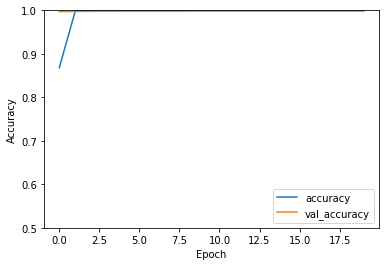

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test= full_model.predict([MNIST_test_images,X_test])

In [ ]:
for index in np.argmax(test[1] , axis=1):
  print(ix_to_char[index])

t
w
o
 
 
 
 
 
 
 


In [ ]:
y_test[1]

'two.'

In [ ]:
!wget -q https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip

!wget -q https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip

!unzip -qq Flickr8k_Dataset.zip

!unzip -qq Flickr8k_text.zip

https://stackoverflow.com/questions/52933222/how-to-combine-rnn-with-cnn